In [1]:
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_Klout.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

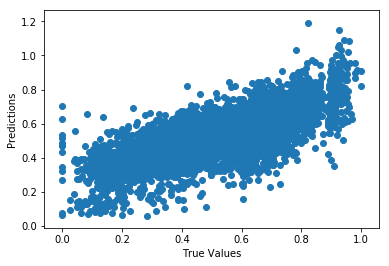

[  6.85518053e-05   3.02445136e-05  -1.52792448e-01   6.71820295e-01
  -3.25154598e+00  -1.12823865e+00   4.85560193e+01  -3.85424199e-04
  -4.75965251e-05  -3.52452640e-04  -5.40501234e-05  -9.47042168e-02
  -1.53382395e-02   2.06201883e-02   2.98391793e-01   6.97677215e+00
   9.90551276e-01  -1.18382163e-01  -4.15953845e-02  -4.25129513e+01
   3.63711583e+01  -1.38452104e-04   4.03363330e-05  -1.55747073e-04
  -1.77504533e-04   3.14567503e-01  -1.63618639e-01   3.59258067e-01
  -3.65231161e-03  -2.52370063e+01   2.65398469e+00   8.38775913e-02
  -1.06637106e-01   3.65467790e+02  -9.19704371e+01  -3.10857203e-07
   9.72126098e-03   1.17639388e-04   1.41777301e-03   2.97171387e-06
   3.11873968e-05  -2.30131420e-06  -1.16514144e-06]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [  0.40068308 -18.27081435   0.45109767   0.34785422]


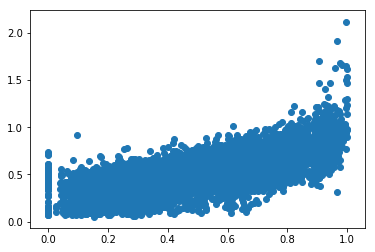

In [7]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [8]:
print(y.shape)
print(predictions.shape)
accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

(23350,)
(23350,)
R2Score: 0.518743145119
RMSE: 0.1440561866753952


In [9]:
print(lm.coef_)

[  6.85518053e-05   3.02445136e-05  -1.52792448e-01   6.71820295e-01
  -3.25154598e+00  -1.12823865e+00   4.85560193e+01  -3.85424199e-04
  -4.75965251e-05  -3.52452640e-04  -5.40501234e-05  -9.47042168e-02
  -1.53382395e-02   2.06201883e-02   2.98391793e-01   6.97677215e+00
   9.90551276e-01  -1.18382163e-01  -4.15953845e-02  -4.25129513e+01
   3.63711583e+01  -1.38452104e-04   4.03363330e-05  -1.55747073e-04
  -1.77504533e-04   3.14567503e-01  -1.63618639e-01   3.59258067e-01
  -3.65231161e-03  -2.52370063e+01   2.65398469e+00   8.38775913e-02
  -1.06637106e-01   3.65467790e+02  -9.19704371e+01  -3.10857203e-07
   9.72126098e-03   1.17639388e-04   1.41777301e-03   2.97171387e-06
   3.11873968e-05  -2.30131420e-06  -1.16514144e-06]
